# Initial data exploration

In [211]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.interpolate import interp1d


Start by importing data from the Florida Wildlife Research Institute (Marathon).

In [98]:
# Import the acoustic indices
fwri_indices = "data/FWRI_Marathon/Native_Duration_30sec/2020_02/Acoustic_Indices.csv"
df = pd.read_csv(fwri_indices)

# Convert to date strings to datetime
df['datetime'] = pd.to_datetime(df['Date'])
df.sort_values('datetime').head(5)

,Date,Filename,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,...,H_Havrda,H_Renyi,H_pairedShannon,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover,datetime
0,2020-02-01 00:05:00,Marathon_20200201_000500.wav,10309.736772,-1.577021e-19,4.800346e-06,-37.417381,94644.152698,39.837276,-51.644541,17.390774,...,0.333320,5.063804,6.669569,58185.953262,0.994952,0.695692,1.716498,88,0.192884,2020-02-01 00:05:00
1,2020-02-01 00:10:30,Marathon_20200201_001030.wav,9440.684925,-4.604779e-20,1.267826e-06,-20.607920,30574.873528,34.054865,-52.015864,11.436184,...,0.333329,5.636632,7.053420,77213.767431,0.997142,0.890235,1.461071,94,0.410746,2020-02-01 00:10:30
2,2020-02-01 00:16:00,Marathon_20200201_001600.wav,11085.205078,-1.324452e-19,8.081782e-07,-12.403769,7219.911895,32.098589,-52.481631,9.246415,...,0.333331,5.861923,7.139644,82047.601502,0.997569,0.942229,1.485036,78,0.143692,2020-02-01 00:16:00
3,2020-02-01 00:21:30,Marathon_20200201_002130.wav,11378.473455,0.000000e+00,8.388392e-07,-44.874411,25612.244002,32.258314,-52.575972,11.083303,...,0.333330,5.697781,7.055520,76712.054106,0.997219,0.864845,1.453410,78,0.198365,2020-02-01 00:21:30
4,2020-02-01 00:27:00,Marathon_20200201_002700.wav,10178.966175,-4.312168e-20,1.001292e-06,10.831631,11003.701974,33.029328,-52.132586,8.827837,...,0.333331,5.955748,7.148476,81931.613194,0.997671,0.987360,1.507947,66,0.123432,2020-02-01 00:27:00


In [7]:
# list the columns
df.columns

Index(['Date', 'Filename', 'ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt',
       'BGNt', 'SNRt', 'MED', 'Ht', 'ACTtFraction', 'ACTtCount', 'ACTtMean',
       'EVNtFraction', 'EVNtMean', 'EVNtCount', 'MEANf', 'VARf', 'SKEWf',
       'KURTf', 'NBPEAKS', 'LEQf', 'ENRf', 'BGNf', 'SNRf', 'Hf', 'EAS', 'ECU',
       'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI', 'rBA',
       'AnthroEnergy', 'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC',
       'HFC', 'ACTspFract', 'ACTspCount', 'ACTspMean', 'EVNspFract',
       'EVNspMean', 'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi',
       'H_pairedShannon', 'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI',
       'ROItotal', 'ROIcover', 'datetime'],
      dtype='object')

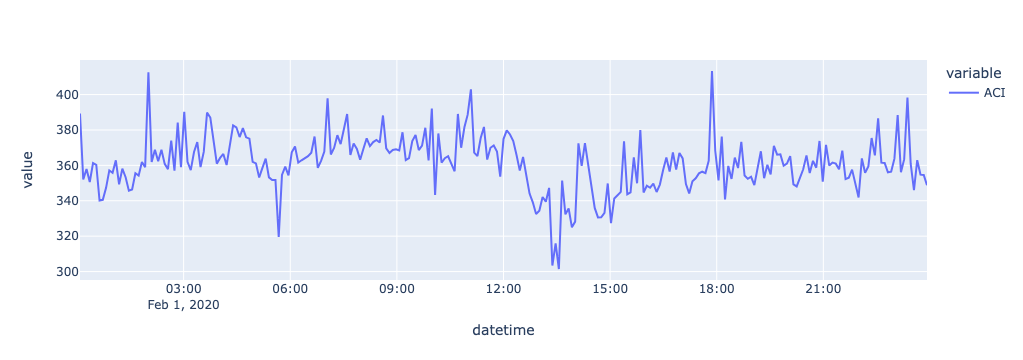

In [62]:
# Sample plot
fig = px.line(df, x="datetime", y=["ACI"])
fig.show()

# Normalize the indices

In [31]:
def normalize_df(df_in, col_names):
    """
    Normalize the requested columns in the provided dataframe, and return a normalized version of the dataframe
    """
    df_new = df_in.copy()
    for col in col_names:
        df_zero = df_in[col] - np.median(df_in[col])
        df_new[col] = df_zero/max(abs(df_zero))

    return df_new

In [107]:
# Normalize all of the index columns 
indices = df.columns[2:-1]
df_norm = normalize_df(df, indices)

# Plot the normalized indices

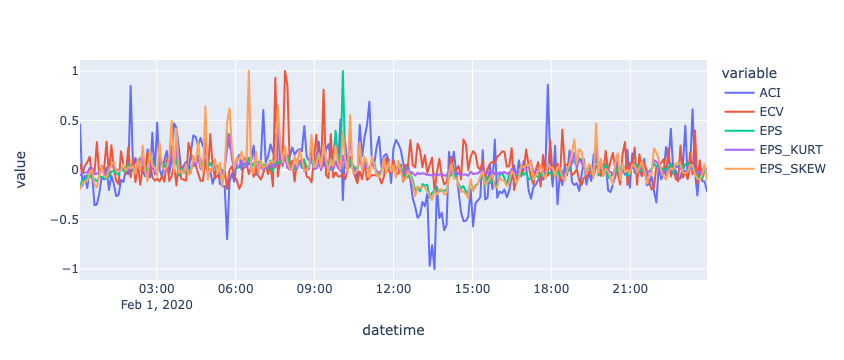

In [33]:
fig = px.line(df_norm, x="datetime", y=["ACI", 'ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW'])
fig.show()

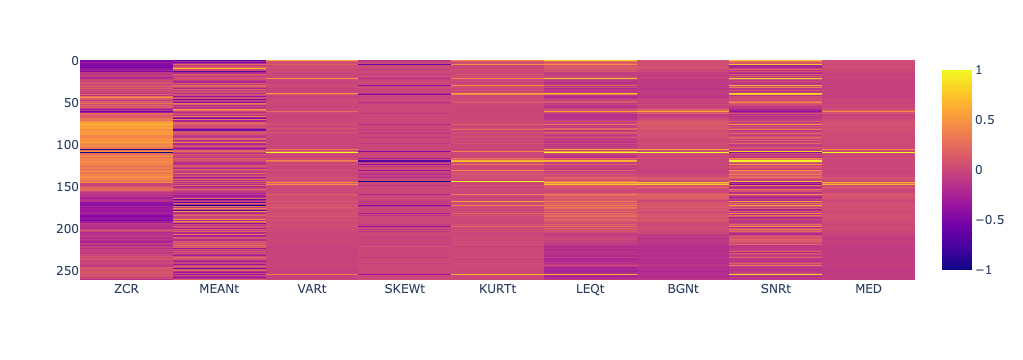

In [40]:
all_cols = df_norm.columns[2:-1]

fig = px.imshow(df_norm[['ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt', 'SNRt', 'MED']],
               width=400)
fig.show()

In [29]:
all_cols

Index(['ZCR', 'MEANt', 'VARt', 'SKEWt', 'KURTt', 'LEQt', 'BGNt', 'SNRt', 'MED',
       'Ht', 'ACTtFraction', 'ACTtCount', 'ACTtMean', 'EVNtFraction',
       'EVNtMean', 'EVNtCount', 'MEANf', 'VARf', 'SKEWf', 'KURTf', 'NBPEAKS',
       'LEQf', 'ENRf', 'BGNf', 'SNRf', 'Hf', 'EAS', 'ECU', 'ECV', 'EPS',
       'EPS_KURT', 'EPS_SKEW', 'ACI', 'NDSI', 'rBA', 'AnthroEnergy',
       'BioEnergy', 'BI', 'ROU', 'ADI', 'AEI', 'LFC', 'MFC', 'HFC',
       'ACTspFract', 'ACTspCount', 'ACTspMean', 'EVNspFract', 'EVNspMean',
       'EVNspCount', 'TFSD', 'H_Havrda', 'H_Renyi', 'H_pairedShannon',
       'H_gamma', 'H_GiniSimpson', 'RAOQ', 'AGI', 'ROItotal', 'ROIcover'],
      dtype='object')

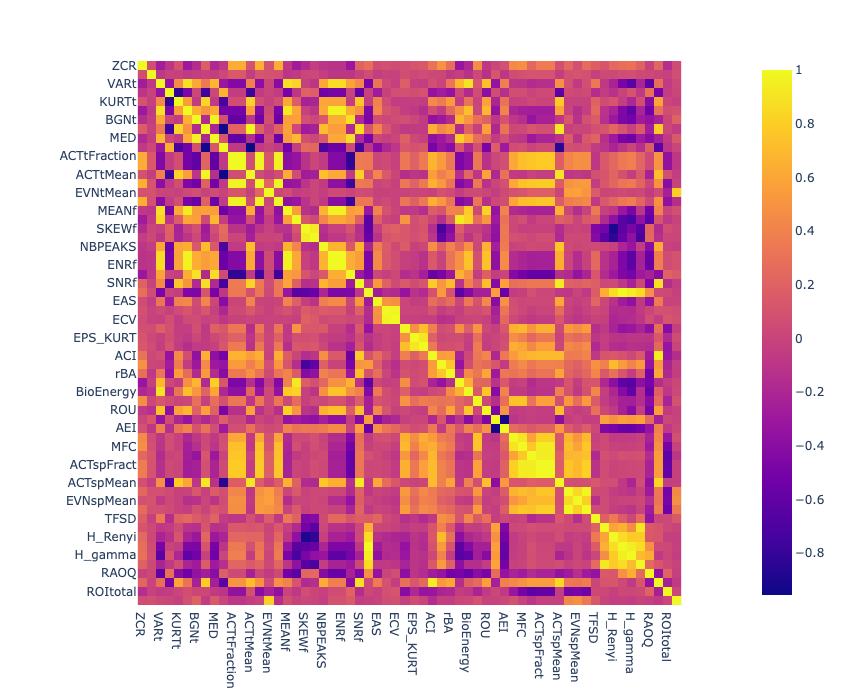

In [39]:
df_data = df_norm[all_cols]
df_corr = df_data.corr()

fig = px.imshow(df_corr, height=700)
fig.show()

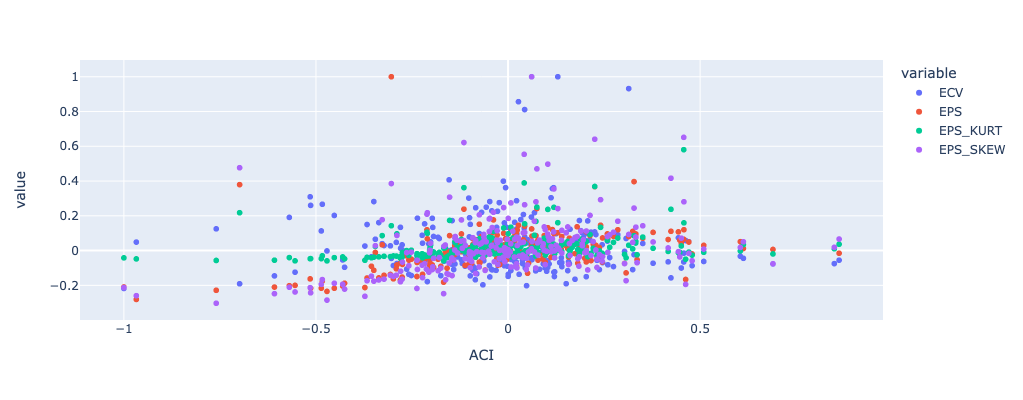

In [48]:
fig = px.scatter(df_norm,  x="ACI", y=['ECV', 'EPS', 'EPS_KURT', 'EPS_SKEW'],
                 width=600, height=400,
                ) 
fig.show()

# Fish annotation data

In [104]:
# Import fish annotations
fish_annotations = "data/FWRI_Marathon/Fish_Annotations/WDR_grouper_fishselection_Feb1-15_2020_SH.txt"
df_fish = pd.read_csv(fish_annotations, delimiter='\t')

# Add datetime column based on the "Begin File" column. Is this correct?
df_fish['filetime'] = pd.to_datetime(df_fish['Begin File'].str[:-4], format='%Y%m%dT%H%M%S')

# Remove unnecessary columns
df_fish.drop(['View', 'Channel', 'call variant', 'level', 'call cutoff @ end', 'calls overlap', 'Notes'], axis=1, inplace=True)

# Convert the offset in seconds to a timedelta
df_fish['timedelta'] = pd.to_timedelta(df_fish['File Offset (s)'], unit='s')

# Create a new column by adding the timedelta to the datetime
df_fish['datetime'] = df_fish['filetime'] + df_fish['timedelta']

In [105]:
df_fish.head(5)

,Selection,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Begin File,Delta Time (s),File Offset (s),Begin Date Time,End Date,End Clock Time,species,filetime,timedelta,datetime
0,1,591.326996,593.261231,12.262,178.322,20200201T014930.wav,1.9342,20.6177,591.3270,NaN,593.2612,Em,2020-02-01 01:49:30,0 days 00:00:20.617700,2020-02-01 01:49:50.617700
1,3,844.170615,854.928905,18.393,312.063,20200201T023900.wav,10.7583,3.1253,844.1706,NaN,854.9289,Em,2020-02-01 02:39:00,0 days 00:00:03.125300,2020-02-01 02:39:03.125300
2,4,913.933644,915.829378,18.393,301.951,20200201T025000.wav,1.8957,12.8136,913.9336,NaN,915.8294,Em,2020-02-01 02:50:00,0 days 00:00:12.813600,2020-02-01 02:50:12.813600
3,6,1061.800933,1063.933634,21.458,190.060,20200201T031730.wav,2.1327,10.4943,1061.8009,NaN,1063.9336,Em,2020-02-01 03:17:30,0 days 00:00:10.494300,2020-02-01 03:17:40.494300
4,7,1277.156392,1279.194306,21.458,283.217,20200201T035600.wav,2.0379,15.5884,1277.1564,NaN,1279.1943,Em,2020-02-01 03:56:00,0 days 00:00:15.588400,2020-02-01 03:56:15.588400


# Filter fish annotations
Only show Feb 1, 2020, since that's the date for which I currently have acoustic indices.

In [108]:
# Date to filter by
specific_date = pd.Timestamp('2020-02-01')

# Create a mask where only the dates match the specific_date
mask = (df_fish['filetime'].dt.date == specific_date.date())

# Apply the mask to filter the DataFrame
filtered_df = df_fish[mask]


In [109]:
filtered_df.sort_values(by="filetime").head(5)

,Selection,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Begin File,Delta Time (s),File Offset (s),Begin Date Time,End Date,End Clock Time,species,filetime,timedelta,datetime
61,84,351.035501,351.840552,57.692,246.503,20200201T010530.wav,0.8051,20.6248,351.0355,NaN,351.8406,Uk,2020-02-01 01:05:30,0 days 00:00:20.624800,2020-02-01 01:05:50.624800
62,85,353.876858,354.350417,44.580,241.259,20200201T010530.wav,0.4736,23.4662,353.8769,NaN,354.3504,Uk,2020-02-01 01:05:30,0 days 00:00:23.466200,2020-02-01 01:05:53.466200
0,1,591.326996,593.261231,12.262,178.322,20200201T014930.wav,1.9342,20.6177,591.3270,NaN,593.2612,Em,2020-02-01 01:49:30,0 days 00:00:20.617700,2020-02-01 01:49:50.617700
1,3,844.170615,854.928905,18.393,312.063,20200201T023900.wav,10.7583,3.1253,844.1706,NaN,854.9289,Em,2020-02-01 02:39:00,0 days 00:00:03.125300,2020-02-01 02:39:03.125300
2,4,913.933644,915.829378,18.393,301.951,20200201T025000.wav,1.8957,12.8136,913.9336,NaN,915.8294,Em,2020-02-01 02:50:00,0 days 00:00:12.813600,2020-02-01 02:50:12.813600


# Plot acoustic and fish data together

In [199]:
def get_fish_presence(df_in, df_fishes, unq_codes):
    """
    Append columns for each of the unique fish codes, with a tally of how many 
    were logged at each time step

    """
    df_out = df_in.copy()
    # Time step for the current acoustic indices data table
    time_step = np.median(np.diff(df_in['datetime'])).astype('timedelta64[s]')
    
    for code in unq_codes:
        fishes = []
        for idx, row in df_in.iterrows():
            time_start = row['datetime']
            time_end = time_start + time_step
            overlap = df_fishes[(df_fishes["species"] == code) & (df_fishes['datetime'] >= time_start) & (df_fishes['datetime'] < time_end)]
            fishes.append(len(overlap))
        df_out[code] = fishes
    return df_out

In [192]:
# Import the fish codes
fish_codes_file = "data/fish_codes.csv"
df_fish_codes = pd.read_csv(fish_codes_file)
unique_codes = np.unique(df_fish_codes['code'])
unique_codes

array(['Em', 'Es', 'Mb', 'Uk', 'Vs'], dtype=object)

In [200]:
df_result = get_fish_presence(df_norm, df_fish, unique_codes)

In [ ]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='lines',
                    name='lines'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines+markers',
                    name='lines+markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='markers', name='markers'))

fig.show()

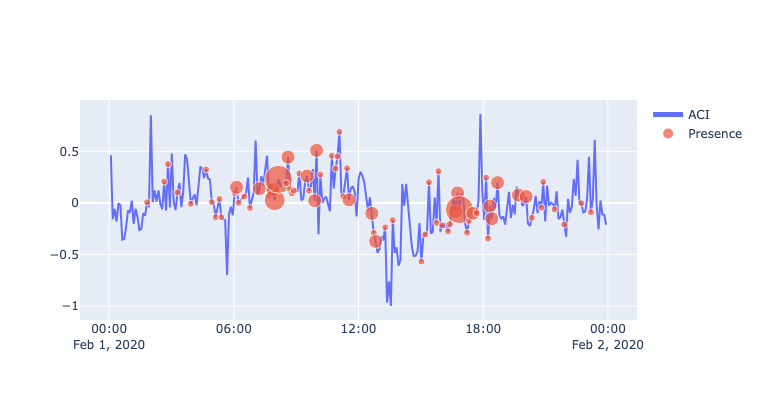

In [241]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=df_result["datetime"], y=df_result["ACI"], 
               mode='lines', name="ACI",
              ))
fig.add_trace(
    go.Scatter(x=df_result["datetime"], y=df_result["ACI"], 
               mode='markers', name="Presence",
               marker_size=df_result["Em"]*7
              ))

fig.update_layout(
    legend= {'itemsizing': 'constant'},
    height=400,
)




In [242]:
outfile = "data/prepped/keywest-withfish.csv"
df_result.to_csv(outfile, index=False)